# Tutorial - Probability and Statistics Review - Solutions

In this tutorial we will review the content of the lectures on probabliity and statistics.

We'll make use of the `scipy.stats` package and the `statsmodels.formula.api` package.

Documentation is here: https://docs.scipy.org/doc/ and here: https://www.statsmodels.org/stable/index.html

Import the relevant packages first.

In [34]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as pl
#%matplotlib inline

## Probability Distributions

1. Compute and plot the probabililty distribution of a Binomial(20,0.2) distribution - i.e. where there are 20 trials, each with a probability of success of 20% 

In [35]:
# Set the parameters
n, p = 20, 0.2
# Generate an array from 0 to n
x = np.arange(0, n+1)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [36]:
# Evaluate the probability mass function at these locations
probs = stats.binom.pmf(x, n, p)
print(probs)

[1.15292150e-02 5.76460752e-02 1.36909429e-01 2.05364143e-01
 2.18199402e-01 1.74559522e-01 1.09099701e-01 5.45498505e-02
 2.21608768e-02 7.38695892e-03 2.03141370e-03 4.61684933e-04
 8.65659248e-05 1.33178346e-05 1.66472932e-06 1.66472932e-07
 1.30056978e-08 7.65041050e-10 3.18767104e-11 8.38860800e-13
 1.04857600e-14]


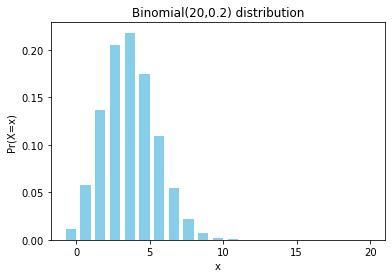

In [37]:
# Plot these probabilities
width = 0.70  # the width of the bars
fig, ax = pl.subplots(1,1)
rects = ax.bar(x - width/2, probs, width, color='SkyBlue')
ax.set(xlabel='x', ylabel='Pr(X=x) ', title='Binomial(20,0.2) distribution');

2. Compute and plot the probability distribution of a Gamma(3,4) distribution - shape=3 and rate=4 (scale=1/4).  (In most cases Gamma distributions are defined by shape+rate, but python uses shape+scale: scale is just 1/rate). Plot the distribution over the range 0 to 3. 

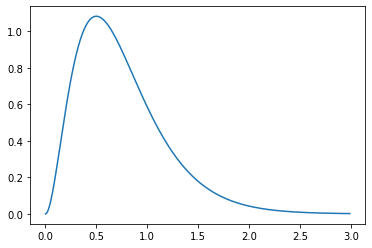

In [38]:
x = np.arange(0, 3, 0.01)
probs = stats.gamma.pdf(x, a=3, scale=1/4)
pl.plot(x, probs)
ax.set(xlabel='x', ylabel='f(X=x) ', title='Gamma(3,4) distribution');

3. If the length of time it takes for an unemployed person to find work is distributed as a Gamma distribution with shape=5 and rate=0.3, calculate the probability it takes between 10 and 20 days to find work. 

In [39]:
shape = 5
rate = 0.3
problt10 = stats.gamma.cdf(10, a=shape, scale=1/rate)
problt20 = stats.gamma.cdf(20, a=shape, scale=1/rate)
print(problt20-problt10)

0.530206744207141


4. There are three boxes on the table - the boxes are closed, and each contains two coins.  One box contains two silver coins (SS), one box contains two gold coins (GG), and the third contains one sliver and one gold coin (SG).  

   (a) I choose a box at random.  The identity of the box X is one of SS, GG or GS.  What are the probabilities that I choose each of the boxes?  i.e. what are the probabilities P(X=SS), P(X=GG) and P(SG)?

   (b) I put my hand in the box, and draw out a coin.  The type of coin Y is either S (silver) or G (gold).   What are the conditional probabilities of drawing a gold coin P(Y=G|X) for each of the three different box identities X?

   (c) What is the probability that at the end of step (b) I am holding a gold coin?

   (d) What is the probability that I have picked the GG box if I am holding a gold coin at the end of step (b)?

In [40]:
# (a)
pXSS = 1/3
pXGG = 1/3
pXSG = 1/3
print(pXSS, pXGG, pXSG)

0.3333333333333333 0.3333333333333333 0.3333333333333333


In [41]:
# (b)
pYGgivenXSS = 0
pYGgivenXGG = 1
pYGgivenXSG = 0.5
print(pYGgivenXSS)
print(pYGgivenXGG)
print(pYGgivenXSG)

0
1
0.5


In [42]:
# (c)
pYG = pYGgivenXSS*pXSS + pYGgivenXGG*pXGG + pYGgivenXSG*pXSG
print(pYG)

0.5


In [43]:
# (d) Bayes Rule
pXGGgivenYG = pYGgivenXGG*pXGG/pYG
print(pXGGgivenYG)

0.6666666666666666


## Expected values and decision making

We'll do some basic calculations of expected values, and then make a decision based on a utility function.

1. An insurance company insures people travelling on skiing holidays.  They charge a premium of \\$100 per person.  For a particular applicant they estimate that there is a 5\% chance that she will have an accident meaning that they will have to pay out \\$1000, and a 1\% chance meaning that they will have to pay out \\$10,000.  

   (a) What is the probablity that they will not have to pay out anything for this applicant if they insure her?

   (b) What payout does the company expect to have to make for this applicant?

   (c) Should the company insure this applicant? Why or why not?

In [44]:
# (a) Prob of no payout
1 - 0.05 - 0.01

0.94

In [45]:
# (b) Expected payout
expected = (0.94)*(0) + (0.05)*1000 + 0.01*10000
print(expected)

# or better:
probs = np.array([0.94, 0.05, 0.01])
payouts = np.array([0, 1000, 10000])
expected = sum(probs*payouts)
print(expected)

150.0
150.0


(c) Should the company insure this applicant?

No: this applicant is expected to cost the company \\$150, but will only earn the company \\$100 in premiums.  It's too risky: their expected loss is \\$50 = \\$150-\\$100.

## Model fitting

Now we'll fit some regression models.  The function that's easiest to use for this is `ols()` from `statsmodels.formula.api`.

Read in the data set of fish lengths, weights and sexes from `fishdata.csv`, and remove any rows with missing weight values.

In [46]:
fish = pd.read_csv('fishdata.csv')
fish = fish.loc[-np.isnan(fish['weight'])]
fish.head()

,sex,lgth,weight
0,1,46.0,510.0
1,2,55.8,900.0
2,1,52.7,820.0
3,2,69.2,2030.0
4,2,59.9,1080.0


In [47]:
n = len(fish)
print(n)

88


1. Make a scatter plot of the data on the linear scale, and another plot on the log scale (take logs of the length and weight).  Use different plot symbols for the males (sex=1) and females (sex=2)

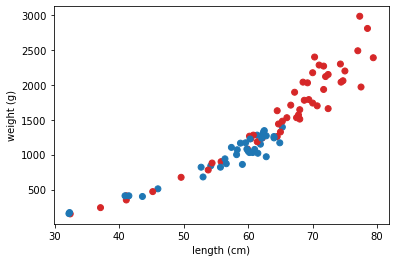

In [48]:
cols = np.where(fish['sex']==1,'tab:blue','tab:red')
fig, ax = pl.subplots(1,1)
pl.scatter(fish['lgth'], fish['weight'], marker='o', c=cols);
ax.set(xlabel='length (cm)', ylabel='weight (g)');

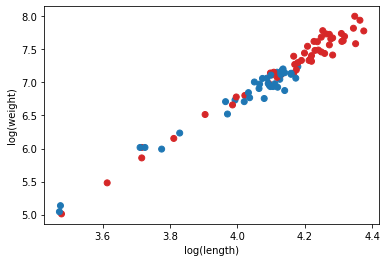

In [49]:
fig, ax = pl.subplots(1,1)
pl.scatter(np.log(fish['lgth']), np.log(fish['weight']), marker='o', c=cols);
ax.set(xlabel='log(length)', ylabel='log(weight)');

2. Compute Pearson's Correlation coefficient of the original and also the log transformed data using `stats.pearsonr`.  Comment on the two coefficient values, any differences between them, and how to interpret the associated p-values.

In [50]:
x = fish['lgth']
y = fish['weight']

print(stats.pearsonr(x,y))

(0.9292095779501953, 6.091940614443475e-39)


In [51]:
x = np.log(fish['lgth'])
y = np.log(fish['weight'])

print(stats.pearsonr(x,y))

(0.9852371378185529, 1.0471426498229211e-67)


*Answer* Both correlation coefficients are close to +1, indicating a strong, positive relationship between length and weight.  The log transformed data have a higher correlation coefficient becase the transformed data are closer to being a straight line.  Both p-values are tiny ($6\times 10^{-39}$ and $1\times 10^{-67}$), and are associated with a test $H_0: r=0$ of no association.  Clearly in both cases $H_0$ is rejected resoundingly.  

3. Fit a simple linear regression model $y=\alpha + \beta x$ to the original (untransformed) data, and compute the fitted values and residuals.  

   There are various ways to do this: I suggest the ols() function in statsmodels.formula.api - but you can google around and find any method you like.   Make sure you work out how to include both an intercept and slope in the model.

In [52]:
x = fish['lgth']
y = fish['weight']
fittedmodel = smf.ols(formula="weight ~ lgth", data=fish).fit() 
predictions = fittedmodel.predict(fish)
residuals = y - predictions

# Print out the statistics
fittedmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     543.7
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           6.09e-39
Time:                        08:47:39   Log-Likelihood:                -602.81
No. Observations:                  88   AIC:                             1210.
Df Residuals:                      86   BIC:                             1215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2006.1979    145.225    -13.814      0.000   -2294.896   -1717.499
lgth          54.3307      2.330     23.318      0.000      49.699      58.963
==============================================================================
Omnibus:                       15.364   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.213
Skew:                           0.989   Prob(JB):                     0.000183
Kurtosis:                       3.885   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. Plot the residuals - first as a histogram and then as a function of log(length), and comment on what the plots show.

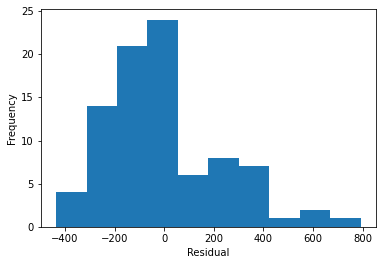

In [53]:
fig, ax = pl.subplots(1,1)
pl.hist(residuals);
ax.set(xlabel='Residual', ylabel='Frequency');

*Answer*: The plot is unimodal, but has a somewhat asymmetric shape.

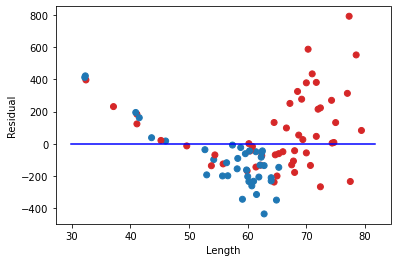

In [54]:
fig, ax = pl.subplots(1,1)
pl.scatter(x, residuals, marker='o', c=cols);
ax.set(xlabel='Length', ylabel='Residual');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = [xmin,xmax] # store these as a vector
yp = [0, 0]
pl.plot(xp, yp, 'b-');


*Answer*: This is a disaster - we have curvature and non-constant variance.  The curvature is caused by the linear model being a very poor description of the data.

5. Plot the fitted linear model as a solid line on top of the original data

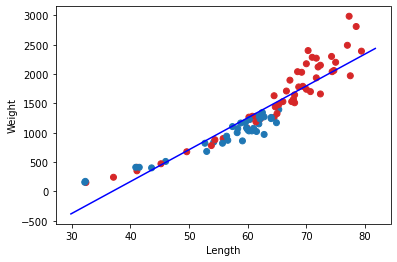

In [55]:
fig, ax = pl.subplots(1,1)
pl.scatter(x, y, marker='o', c=cols);
ax.set(xlabel='Length', ylabel='Weight');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = [xmin, xmax]
xpmat = pd.DataFrame({'lgth':xp})
yp = fittedmodel.predict(xpmat)
pl.plot(xp, yp, 'b-');


*Answer* The data are curved, so the straight line fit is hopeless.

6. Now fit a quadratic curve to the untransformed data, plot the residuals and the fitted curve.

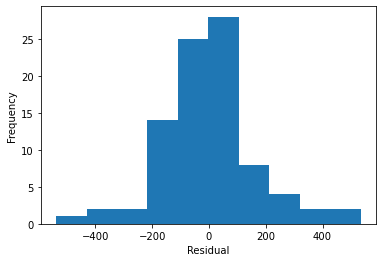

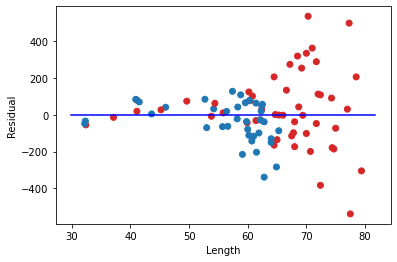

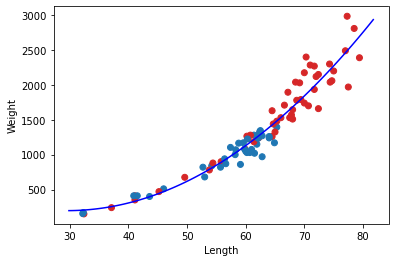

In [56]:
x = fish['lgth']
y = fish['weight']
fish['lgth2'] = fish['lgth']**2

fittedmodel = smf.ols(formula="weight ~ lgth + lgth2", data=fish).fit() 
predictions = fittedmodel.predict(fish)
residuals = y - predictions

fig, ax = pl.subplots(1,1)
pl.hist(residuals);
ax.set(xlabel='Residual', ylabel='Frequency');

fig, ax = pl.subplots(1,1)
pl.scatter(x, residuals, marker='o', c=cols);
ax.set(xlabel='Length', ylabel='Residual');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = [xmin,xmax] # store these as a vector
yp = [0, 0]
pl.plot(xp, yp, 'b-');

fig, ax = pl.subplots(1,1)
pl.scatter(x, y, marker='o', c=cols);
ax.set(xlabel='Length', ylabel='Weight');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = np.linspace(xmin, xmax, 101)
xpmat = pd.DataFrame({'lgth':xp, 'lgth2':xp**2})
yp = fittedmodel.predict(xpmat)
pl.plot(xp, yp, 'b-');

*Answer*: Things are looking a lot better, the residuals have a bell shaped (Normal looking) distribution, the line goes through the data nicely, but there is funnelling in the residuals, so not a good fit.

7. Refit the model, but this time just a linear model to the log transformed data.  Make plots of the fitted model on the linear and the log scale.

In [57]:
fish['logWeight'] = np.log(fish['weight'])
fish['logLength'] = np.log(fish['lgth'])
x = fish['logLength']
y = fish['logWeight']

fittedmodel = smf.ols("logWeight ~ logLength", data=fish).fit()
predictions = fittedmodel.predict(fish)
residuals = y - predictions


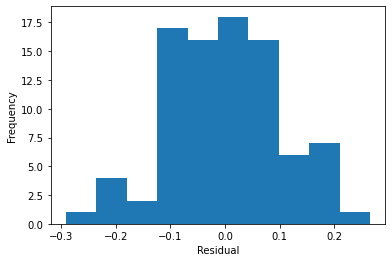

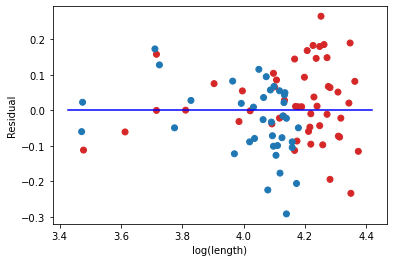

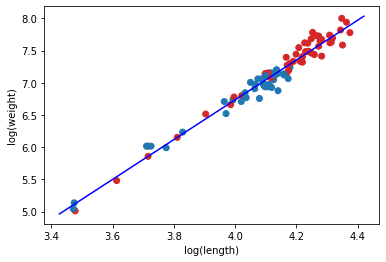

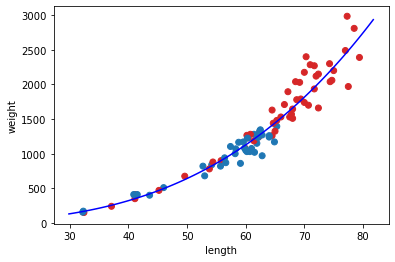

In [58]:
fish['logWeight'] = np.log(fish['weight'])
fish['logLength'] = np.log(fish['lgth'])
x = fish['logLength']
y = fish['logWeight']

fittedmodel = smf.ols("logWeight ~ logLength", data=fish).fit()
predictions = fittedmodel.predict(fish)
residuals = y - predictions

fig, ax = pl.subplots(1,1)
pl.hist(residuals);
ax.set(xlabel='Residual', ylabel='Frequency');

fig, ax = pl.subplots(1,1)
pl.scatter(x, residuals, marker='o', c=cols);
ax.set(xlabel='log(length)', ylabel='Residual');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = [xmin,xmax] # store these as a vector
yp = [0, 0]
pl.plot(xp, yp, 'b-');

fig, ax = pl.subplots(1,1)
pl.scatter(x, y, marker='o', c=cols);
ax.set(xlabel='log(length)', ylabel='log(weight)');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = np.linspace(xmin, xmax, 101)
xpmat = pd.DataFrame({'logLength':xp})
yp = fittedmodel.predict(xpmat)
pl.plot(xp, yp, 'b-');

fig, ax = pl.subplots(1,1)
pl.scatter(np.exp(x), np.exp(y), marker='o', c=cols);
ax.set(xlabel='length', ylabel='weight');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = np.linspace(xmin, xmax, 101)
xp = np.linspace(xmin, xmax, 101)
xpmat = pd.DataFrame({'logLength':np.log(xp)})
yp = fittedmodel.predict(xpmat)
pl.plot(xp, np.exp(yp), 'b-');


*Amswer*: This looks much much better - no funnelling, and the residuals look roughly Normal

8. Confirm the normality of the residuals.

In [59]:
r = residuals/np.std(residuals)
stats.kstest(r,'norm')

KstestResult(statistic=0.047172370989734314, pvalue=0.9844804619920321)

*Answer*: The large p-value here suggests that the standardised residuals are consistent with a standard Normal distribution.  (We note that the K-S test is strictly only valid with the predicted values and the standard deviation are the true values, not using estimates from a model fit, but this test here is still a good enough indication that the modelling assumptions are met.)

9. Now add sex as a covariate, and see if that improves the model

In [60]:
x = np.log(fish['lgth'])
y = np.log(fish['weight'])
fish.head()

,sex,lgth,weight,lgth2,logWeight,logLength
0,1,46.0,510.0,2116.00,6.234411,3.828641
1,2,55.8,900.0,3113.64,6.802395,4.021774
2,1,52.7,820.0,2777.29,6.709304,3.964615
3,2,69.2,2030.0,4788.64,7.615791,4.237001
4,2,59.9,1080.0,3588.01,6.984716,4.092677


In [61]:
fittedmodel = smf.ols(formula="logWeight ~ logLength*C(sex)", data=fish).fit()
fittedmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logWeight   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1030.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           4.16e-66
Time:                        08:47:40   Log-Likelihood:                 77.576
No. Observations:                  88   AIC:                            -147.2
Df Residuals:                      84   BIC:                            -137.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.9409      0.388    -12.736      0.000      -5.712      -4.169
C(sex)[T.2]              -0.7989      0.498     -1.606      0.112      -1.788       0.190
logLength                 2.9129      0.096     30.237      0.000       2.721       3.104
logLength:C(sex)[T.2]     0.2103      0.122      1.724      0.088      -0.032       0.453
==============================================================================
Omnibus:                        0.417   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.539
Skew:                          -0.148   Prob(JB):                        0.764
Kurtosis:                       2.755   Cond. No.                         284.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Answer*: Note that the p-values for the terms involving sex are not significant, so we don't need to include those terms: there is no evidence for a difference in growth patterns by sex.

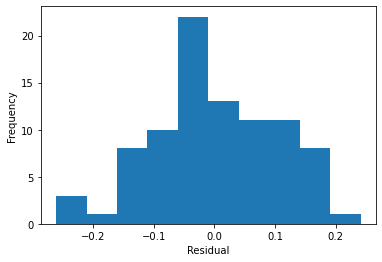

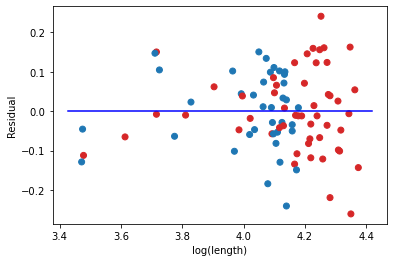

In [62]:
predictions = fittedmodel.predict(fish)
residuals = fish['logWeight'] - predictions

fig, ax = pl.subplots(1,1)
pl.hist(residuals);
ax.set(xlabel='Residual', ylabel='Frequency');

fig, ax = pl.subplots(1,1)
pl.scatter(fish['logLength'], residuals, marker='o', c=cols);
ax.set(xlabel='log(length)', ylabel='Residual');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = [xmin,xmax] # store these as a vector
yp = [0, 0]
pl.plot(xp, yp, 'b-');

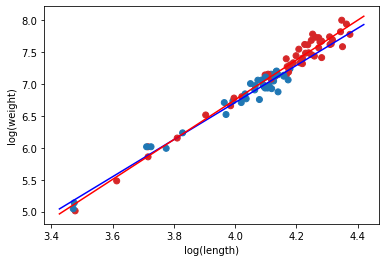

In [63]:
fig, ax = pl.subplots(1,1)
pl.scatter(fish['logLength'], fish['logWeight'], marker='o', c=cols);
ax.set(xlabel='log(length)', ylabel='log(weight)');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = np.linspace(xmin, xmax, 101)
xpmat = pd.DataFrame({'logLength':xp})
xpmat['sex'] = 1
yp = fittedmodel.predict(xpmat)
pl.plot(xp, yp, 'b-');
xpmat['sex'] = 2
yp = fittedmodel.predict(xpmat)
pl.plot(xp, yp, 'r-');

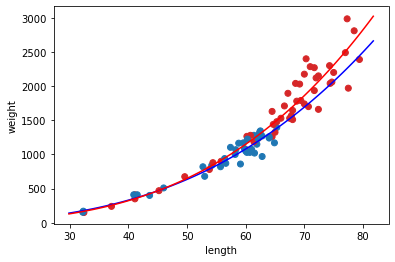

In [64]:
fig, ax = pl.subplots(1,1)
pl.scatter(fish['lgth'], fish['weight'], marker='o', c=cols);
ax.set(xlabel='length', ylabel='weight');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = np.linspace(xmin, xmax, 101)
xpmat = pd.DataFrame({'logLength':np.log(xp)})
xpmat['sex'] = 1
yp = fittedmodel.predict(xpmat)
pl.plot(xp, np.exp(yp), 'b-');
xpmat['sex'] = 2
yp = fittedmodel.predict(xpmat)
pl.plot(xp, np.exp(yp), 'r-');

# Another example to try

Play around with this dataset of data on health, with variables
- sbp = systolic blood pressure
- tobacco = cumulative tobacco (kg)
- ldl = low density lipoprotein cholesterol
- adiposity
- famhist = family history of heart disease (Present, Absent)
- typea = type-A behavior
- obesity
- alcohol = current alcohol consumption
- age = age at onset
- chd = coronary heart disease (yes=1, no=0)

A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in  Rousseauw et al, 1983, South African Medical Journal. 

In [65]:
df = pd.read_csv('SAheart.csv', index_col=0)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
